# Final Project

## Random Forest

In [1]:
from medmnist import BloodMNIST
import torchvision.transforms as transforms

data_transform = transforms.Compose([       
    transforms.ToTensor(),                  
    transforms.Normalize((0.5,), (0.5,))   
])

# spliting train/test data and applying transformations
train_dataset = BloodMNIST(split='train', download=True, transform=data_transform)   
test_dataset = BloodMNIST(split='test', download=True, transform=data_transform)     


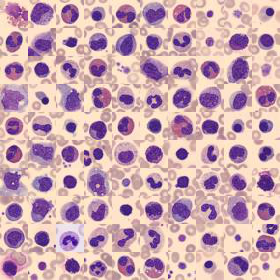

In [2]:
train_dataset.montage(length=10)     # prints a 10 x 10 montage of images form the train dataset

In [3]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from medmnist import INFO
import medmnist
from torchvision import transforms

# Dataset
data_flag = 'bloodmnist'
info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

# Transform: convert PIL image to tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load datasets
train_dataset = DataClass(split='train', transform=transform, download=True)
test_dataset = DataClass(split='test', transform=transform, download=True)

# Convert images to numpy and flatten
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for i in range(len(dataset)):
        img, label = dataset[i]
        images.append(img.numpy().flatten()) 
        labels.append(label[0])  
    return np.stack(images), np.array(labels)

X_train, y_train = dataset_to_numpy(train_dataset)
X_test, y_test = dataset_to_numpy(test_dataset)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [4]:
# prints evaluation metrics

from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize

y_score = clf.predict_proba(X_test)  
y_pred = clf.predict(X_test)
n_classes = len(info['label'])

y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# AUC
per_class_auc = roc_auc_score(y_test_bin, y_score, average=None, multi_class='ovr')
overall_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')


# overall precision/recall
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

# results
# per-class auc
print("Per-Class AUC:")
for i, auc in enumerate(per_class_auc):
    class_name = info['label'][str(i)]
    print(f"  Class {i}: AUC = {auc:.4f}")

# overall auc
print(f'Overall AUC: {overall_auc:.4f}')

# per class precision/recall
print(classification_report(y_test, y_pred, digits=4))

# overall precision/recall
print("\n Overall Precision & Recall:")
print(f"Precision: {precision_macro:.4f}")
print(f"Recall: {recall_macro:.4f}")


Per-Class AUC:
  Class 0: AUC = 0.9546
  Class 1: AUC = 0.9903
  Class 2: AUC = 0.9783
  Class 3: AUC = 0.9350
  Class 4: AUC = 0.9898
  Class 5: AUC = 0.9567
  Class 6: AUC = 0.9894
  Class 7: AUC = 0.9999
Overall AUC: 0.9743
              precision    recall  f1-score   support

           0     0.7247    0.5287    0.6114       244
           1     0.8975    0.9263    0.9117       624
           2     0.8881    0.8167    0.8509       311
           3     0.6314    0.7841    0.6995       579
           4     0.8442    0.8025    0.8228       243
           5     0.8500    0.4789    0.6126       284
           6     0.8595    0.9459    0.9006       666
           7     0.9936    0.9936    0.9936       470

    accuracy                         0.8310      3421
   macro avg     0.8361    0.7846    0.8004      3421
weighted avg     0.8374    0.8310    0.8268      3421


 Overall Precision & Recall:
Precision: 0.8361
Recall: 0.7846
